In [1]:
PATH_IMAGE = '/autofs/space/pade_003/users/yb947/data/U01/spim/raw/tiff/l638_08_fused_3-3um.tiff'
PATH_XML = 'example_stereology.xml'


In [2]:
import sys
sys.path.insert(0, '..')

import tifffile
from mbfio.xml import parse_stereo
from mbfio.polygons import is_inside
import matplotlib.pyplot as plt
import numpy as np


In [3]:
fimg = tifffile.TiffFile(PATH_IMAGE)
img = fimg.asarray()


In [4]:
img = np.transpose(img)
img.shape

(4191, 4279, 242)

In [5]:
img2d = np.sqrt((img*img).sum(-1) / len(img))


In [6]:
info = parse_stereo(PATH_XML, space='voxel', unit='voxel')


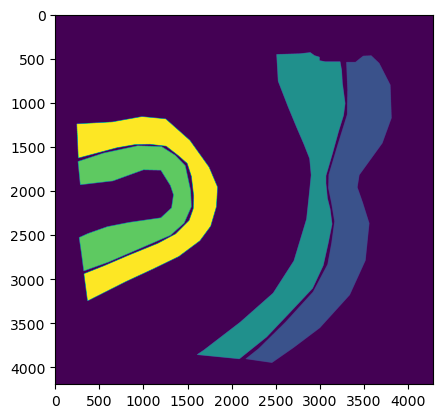

In [7]:
indices = np.indices(img2d.shape, dtype='float32')
indices = np.moveaxis(indices, 0, -1)

labels = 0
for n, contour in enumerate(info['sections']['S1']['contours']):
    points = contour['points'][:, :2]
    mask = is_inside(indices, points)
    labels += info['regions'][contour['name']] * mask

plt.imshow(labels)
plt.show()

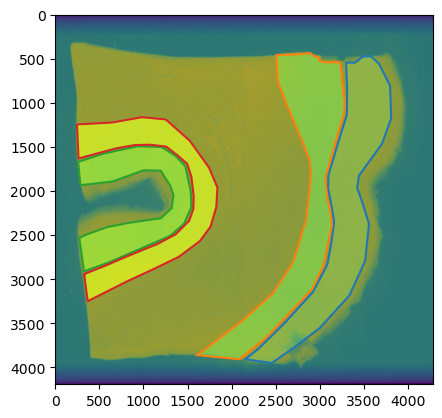

In [8]:
plt.imshow(img2d)
plt.imshow(labels, alpha=0.3)

for contour in info['S1']['contours']:
    points = contour['points'][:, :2]
    points = np.concatenate([points, points[:1, ]], 0)
    plt.plot(points[:, 1], points[:, 0])

plt.show()
